Ковшик А.С. 201-362

In [93]:
import scipy.stats as sps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

%matplotlib inline

### 1. Работа с библиотекой `scipy.stats`.

<b>Общий принцип:</b>

Пусть $X$ — класс, реализующий некоторое распределение. Конкретное распределение с параметрами `params` можно получить как **`X(params)`**. У него доступны следующие методы:


* `X(params).rvs(size=N)` — генерация выборки размера $N$ (<b>R</b>andom <b>V</b>ariate<b>S</b>). Возвращает `numpy.array`;
* `X(params).cdf(x)` — значение функции распределения в точке $x$ (<b>C</b>umulative <b>D</b>istribution <b>F</b>unction);
* `X(params).logcdf(x)` — значение логарифма функции распределения в точке $x$;
* `X(params).ppf(q)` — $q$-квантиль (<b>P</b>ercent <b>P</b>oint <b>F</b>unction);
* `X(params).mean()` — математическое ожидание;
* `X(params).median()` — медиана ($1/2$-квантиль);
* `X(params).var()` — дисперсия (<b>Var</b>iance);
* `X(params).std()` — стандартное отклонение = корень из дисперсии (<b>St</b>andard <b>D</b>eviation).

Кроме того для непрерывных распределений определены функции
* `X(params).pdf(x)` — значение плотности в точке $x$ (<b>P</b>robability <b>D</b>ensity <b>F</b>unction);
* `X(params).logpdf(x)` — значение логарифма плотности в точке $x$.

А для дискретных
* `X(params).pmf(k)` — значение дискретной плотности в точке $k$ (<b>P</b>robability <b>M</b>ass <b>F</b>unction);
* `X(params).logpdf(k)` — значение логарифма дискретной плотности в точке $k$.

Все перечисленные выше методы применимы как к конкретному распределению `X(params)`, так и к самому классу `X`. Во втором случае параметры передаются в сам метод. Например, вызов `X.rvs(size=N, params)` эквивалентен `X(params).rvs(size=N)`. При работе с распределениями и случайными величинами рекомендуем использовать первый способ, посколько он больше согласуется с математическим синтаксисом теории вероятностей.

Параметры могут быть следующими:
* `loc` — параметр сдвига;
* `scale` — параметр масштаба;
* и другие параметры (например, $n$ и $p$ для биномиального).

---

Для примера сгенерируем выборку размера $N = 200$ из распределения $\mathcal{N}(1, 9)$ и посчитаем некоторые статистики.
В терминах выше описанных функций у нас $X$ = `sps.norm`, а `params` = (`loc=1, scale=3`).

*Примечание.* Выборка — набор независимых одинаково распределенных случайных величин. Часто в разговорной речи выборку отождествляют с ее *реализацией* — значения случайных величин из выборки при "выпавшем" элементарном исходе.

In [94]:
sample = sps.norm(loc=1, scale=3).rvs(size=200)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [ 5.65516784  3.94661746  4.12425622  1.69197024  3.50981233  4.52963701
  1.62938078 -0.63719448  3.93169982  2.13148578]
Выборочное среденее: 1.198
Выборочная дисперсия: 8.525


Вероятностные характеристики

In [95]:
print('Плотность:\t\t', sps.norm(loc=1, scale=3).pdf([-1, 0, 1, 2, 3]))
print('Функция распределения:\t', sps.norm(loc=1, scale=3).cdf([-1, 0, 1, 2, 3]))

Плотность:		 [0.10648267 0.12579441 0.13298076 0.12579441 0.10648267]
Функция распределения:	 [0.25249254 0.36944134 0.5        0.63055866 0.74750746]


$p$-квантиль распределения с функцией распределения $F$ — это число $min\{x: F(x) \geqslant p\}$.

In [96]:
print('Квантили:', sps.norm(loc=1, scale=3).ppf([0.05, 0.1, 0.5, 0.9, 0.95]))

Квантили: [-3.93456088 -2.8446547   1.          4.8446547   5.93456088]


Cгенерируем выборку размера $N = 200$ из распределения $Bin(10, 0.6)$ и посчитаем некоторые статистики.
В терминах выше описанных функций у нас $X$ = `sps.binom`, а `params` = (`n=10, p=0.6`).

In [97]:
sample = sps.binom(n=10, p=0.6).rvs(size=200)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [5 4 7 7 6 6 5 5 6 6]
Выборочное среденее: 5.935
Выборочная дисперсия: 2.171


In [98]:
print('Дискретная плотность:\t', sps.binom(n=10, p=0.6).pmf([-1, 0, 5, 5.5, 10]))
print('Функция распределения:\t', sps.binom(n=10, p=0.6).cdf([-1, 0, 5, 5.5, 10]))

Дискретная плотность:	 [0.00000000e+00 1.04857600e-04 2.00658125e-01 2.34848964e-01
 6.04661760e-03]
Функция распределения:	 [0.00000000e+00 1.04857600e-04 3.66896742e-01 3.66896742e-01
 1.00000000e+00]


In [99]:
print('Квантили:', sps.binom(n=10, p=0.6).ppf([0.05, 0.1, 0.5, 0.9, 0.95]))

Квантили: [3. 4. 6. 8. 8.]


Бывает так, что <b>надо сгенерировать выборку из распределения, которого нет в `scipy.stats`</b>.
Для этого надо создать класс, который будет наследоваться от класса `rv_continuous` для непрерывных случайных величин и от класса `rv_discrete` для дискретных случайных величин.
<a  target="_blank" href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous">Пример из документации.</a>

Для примера сгенерируем выборку из распределения с плотностью $f(x) = \frac{4}{15} x^3 I\{x \in [1, 2] = [a, b]\}$.

In [100]:
class cubic_gen(sps.rv_continuous):
    def _pdf(self, x):
        return 4 * x ** 3 / 15
cubic = cubic_gen(a=1, b=2, name='cubic')

sample = cubic.rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [1.9602941  1.67502313 1.27064438 1.85420957 1.36798793 1.68886775
 1.57511949 1.13288241 1.43399909 1.59439899]
Выборочное среденее: 1.639
Выборочная дисперсия: 0.065


Если дискретная случайная величина может принимать небольшое число значений, то можно не создавать новый класс, как показано выше, а явно указать эти значения и из вероятности.

In [101]:
some_distribution = sps.rv_discrete(
    name='some_distribution', 
    values=([1, 2, 3], [0.6, 0.1, 0.3])  # значения и вероятности
)

sample = some_distribution.rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Частота значений по выборке:', 
      (sample == 1).mean(), (sample == 2).mean(), (sample == 3).mean())

Первые 10 значений выборки:
 [1 3 2 1 1 1 1 1 2 1]
Выборочное среденее: 1.620
Частота значений по выборке: 0.62 0.14 0.24


<hr>

<hr>

<hr>

# HW:

**Задача 1.** Сгенерировать выборку размера 10 из распределения $\mathcal{Laplace}(\alpha, \beta)$. Для данной выборки подсчитайте выборочные зарактеристики. Постройте гистограмму, эмпирическую функцию распределения.



In [102]:
a = 1 # коэффициент масштаба
b = 0 # коэффициент сдвига

laplace_rv = sps.laplace(loc=b, scale=a)
sample = laplace_rv.rvs(size=10)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [-0.31669099  2.18230417  0.02518379  0.57815    -0.7203017  -0.23557128
 -1.63782356  0.32784298  0.25442747  0.24945232]
Выборочное среденее: 0.071
Выборочная дисперсия: 0.864


Вероятностные характеристики

In [103]:
print('Плотность:\t\t', laplace_rv.pdf([-1, 0, 1, 2, 3]))
print('Функция распределения:\t', laplace_rv.cdf([-1, 0, 1, 2, 3]))

Плотность:		 [0.18393972 0.5        0.18393972 0.06766764 0.02489353]
Функция распределения:	 [0.18393972 0.5        0.81606028 0.93233236 0.97510647]


In [104]:
print('Квантили:', laplace_rv.ppf([0.05, 0.1, 0.5, 0.9, 0.95]))

Квантили: [-2.30258509 -1.60943791  0.          1.60943791  2.30258509]


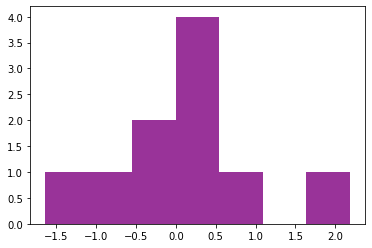

In [105]:
_ = plt.hist(sample, bins = 'auto', color='purple', alpha=0.8)

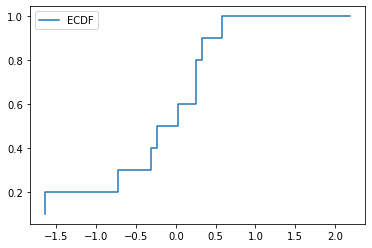

In [106]:
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')
_ = plt.legend()

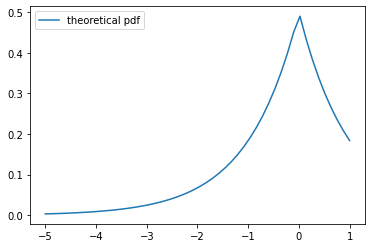

In [107]:
x = np.linspace(-5, 1)
pdf = laplace_rv.pdf(x) # плотность теоретической величины
plt.plot(x, pdf, label='theoretical pdf')
_ = plt.legend()

**Задача 2.** Скачайте <a href="https://www.kaggle.com/spscientist/students-performance-in-exams
">датасет</a> с данными о результатах учащихся на экзаменах.

Данный датасет состоит из таблицы баллов учащихся на экзаменах по математике, чтению и письму, а также дополнительной информации о студентах. Каждая строка соответствует одному учащемуся, каждый столбец соответствует одному признаку. В столбцах math score, reading score и writing score записаны баллы за экзамены.

Для исследования возьмите столбцы 'math score', 'reading score', 'writing score'.

----

Чтобы скачать данные, зарегистрируйтесь на сайте, после нажмите download на странице датасета и распакуйте скачанный архив. Вы получите файл формата `csv`.

Если вы работаете в Google Colab, можно загрузить полученный файл в разделе "Файлы" (значок папки) на левой панели.

In [108]:
# эта функция читает данные, в кавычках укажите путь к файлу на вашем компьютере или в Colab
df = pd.read_csv("./StudentsPerformance.csv")

In [109]:
#Посмотрите на первые строки этой таблицы.
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [110]:
#Выберите несколько (3-6) столбцов для анализа значений в них.
columns = ['math score', 'reading score', 'writing score']

df_chosen_columns = df[columns]

#Одномерный массив значений одного признака (например, 'math score') можно получить так:
#df_chosen_columns['math score']

#### Гистограммы

Для каждого из выбранных признаков нарисуйте гистограмму распределения. Для этого воспользуйтесь функцией `matplotlib.pyplot.hist`.

Предположите, для каких признаков возможно наличие выбросов. Эту проблему можно решить с помощью параметра range, который определяет, в каких границах строится гистограмма.

<b>Для определения выбросов будем использовать межквартильный диапазон (IQR), равный разнице между третьим квартилем и первым квартилем (IQR = Q3 - Q1). Выбросы в этом случае определяются как наблюдения, которые ниже (Q1 - 1,5 * IQR) или выше (Q3 + 1,5 * IQR).</b>

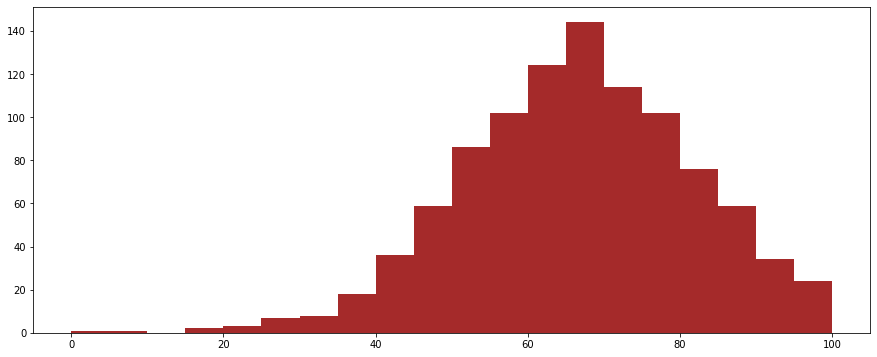

In [111]:
plt.figure(figsize=(15, 6))
plt.hist(df_chosen_columns['math score'], bins=20, color='brown');
msQ1 = df_chosen_columns['math score'].quantile(0.25)
msQ3 = df_chosen_columns['math score'].quantile(0.75)
msIQR = msQ3 - msQ1

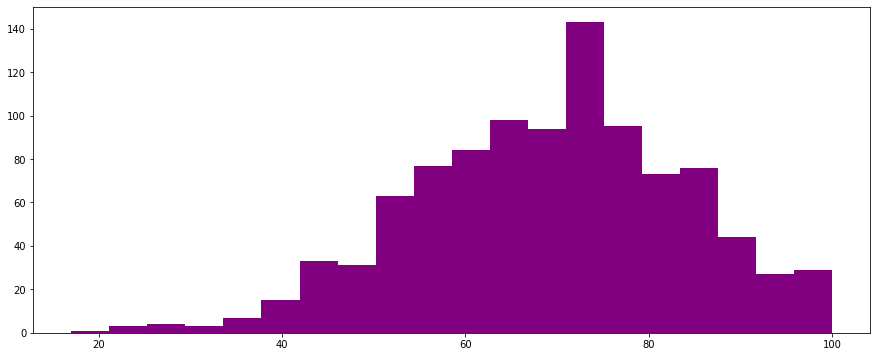

In [112]:
plt.figure(figsize=(15, 6))
plt.hist(df_chosen_columns['reading score'], bins=20, color='purple');
rsQ1 = df_chosen_columns['reading score'].quantile(0.25)
rsQ3 = df_chosen_columns['reading score'].quantile(0.75)
rsIQR = rsQ3 - rsQ1

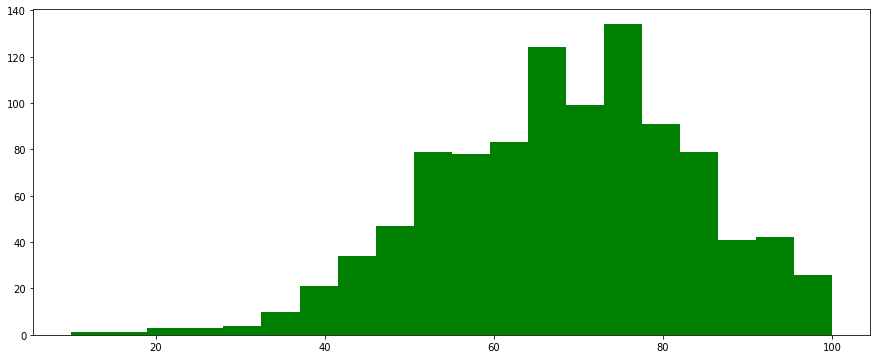

In [113]:
plt.figure(figsize=(15, 6))
plt.hist(df_chosen_columns['writing score'], bins=20, color='green');
wsQ1 = df_chosen_columns['reading score'].quantile(0.25)
wsQ3 = df_chosen_columns['reading score'].quantile(0.75)
wsIQR = wsQ3 - wsQ1

В словаре ranges_without_outliers укажите, в каких пределах, по вашему мнению, стоит нарисовать гистограмму распределения для каждого признака.

In [114]:
# range = [(Q1 - 1.5*IQR), (Q3 + 1.5*IQR)]
ranges_without_outliers = {
    'math score' : ((msQ1 - 1.5*msIQR), (msQ3 + 1.5*msIQR)),
    'reading score' : ((rsQ1 - 1.5*rsIQR), (rsQ3 + 1.5*rsIQR)),
    'writing score' : ((wsQ1 - 1.5*wsIQR), (wsQ3 + 1.5*wsIQR))
}

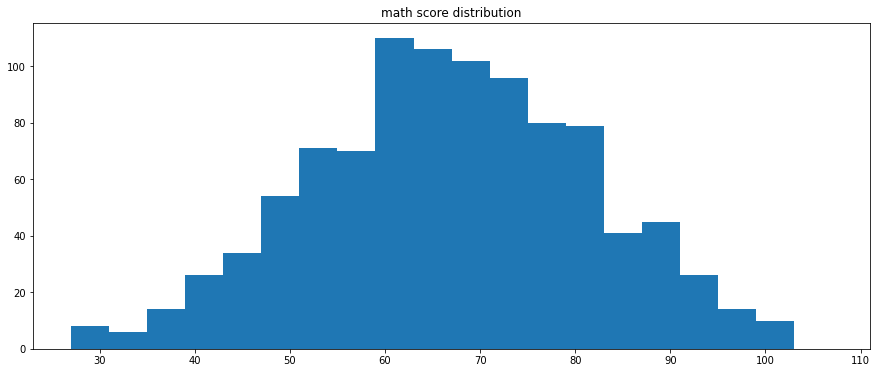

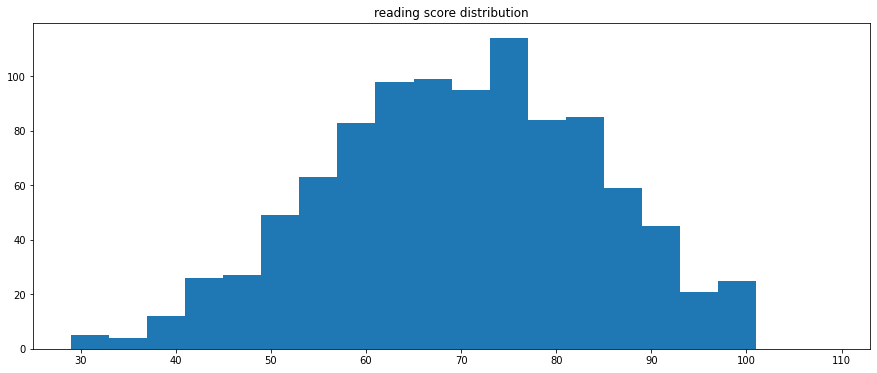

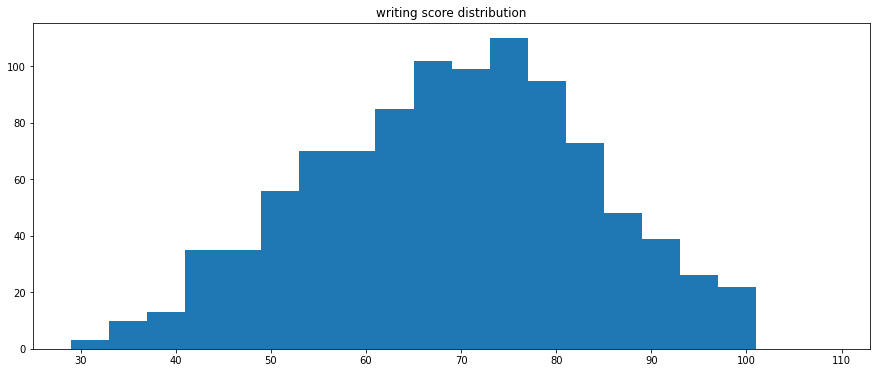

In [92]:
#Аналогично определите интервалы для исследуемых признаков
for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    plt.hist(df_chosen_columns[column], range=column_range, bins=20)
    plt.title(column + ' distribution')

Сделайте выводы

Изменилась ли форма распределений, стали ли графики информативнее?

Форма распределений изменилась. Получившиеся графики позволяют уделить больше внимания основным результатам. С общей точки зрения, графики стали менее информативными из-за того, что отображается лишь часть данных в установленных границах.